In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [3]:
fuji.shape

(300, 5)

In [4]:
fuji[0:10, :]

array([[   0.      ,   35.134141,  139.132082,    0.      ,    0.      ],
       [   1.      ,   35.135826,  139.129202,    0.      ,  322.      ],
       [   2.      ,   35.13751 ,  139.126322,    0.      ,  644.      ],
       [   3.      ,   35.139194,  139.123441,    0.      ,  966.      ],
       [   4.      ,   35.140878,  139.12056 ,    0.      , 1288.      ],
       [   5.      ,   35.142562,  139.117679,    0.      , 1611.      ],
       [   6.      ,   35.144246,  139.114799,    6.62    , 1933.      ],
       [   7.      ,   35.145929,  139.111917,    7.21    , 2255.      ],
       [   8.      ,   35.147613,  139.109036,   12.2     , 2577.      ],
       [   9.      ,   35.149297,  139.106155,   54.41    , 2899.      ]])

## 【問題1】データの可視化

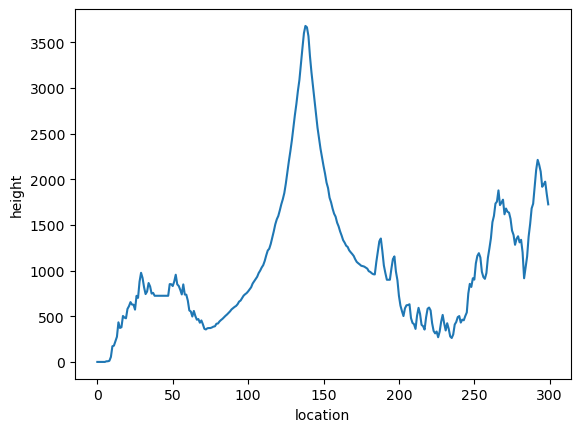

In [5]:
xs = fuji[:, 0]
ys = fuji[:, 3]

fig, ax = plt.subplots()
ax.set_xlabel("location")
ax.set_ylabel("height")
ax.plot(xs, ys)
plt.show()

## 【問題2】ある地点の勾配を計算する関数を作成

In [6]:
def grad(i):
    dx = 1
    # 定義域から出ないようにする
    k = int(max(np.min(xs), min(i - dx, np.max(xs))))
    return (ys[i] - ys[k]) / dx

In [7]:
grad(100)

18.90000000000009

In [8]:
grad(50)

-20.360000000000014

In [9]:
grad(150)

-94.9699999999998

## 【問題3】移動先の地点を計算する関数を作成

In [10]:
def move(current, alpha=0.2):
    dy = grad(current)
    i = round(current - alpha * dy)
    return int(max(np.min(xs), min(i, np.max(xs))))

In [11]:
move(100)

96

## 【問題4】山を下る関数を作成

In [12]:
start = 136

def descent(alpha=0.2):
    positions = [start]
    while True:
        current = positions[-1]
        p = move(current, alpha=alpha)
        if p in positions:
            return positions
        positions.append(p)

In [13]:
descent()

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]

## 【問題5】下山過程の可視化

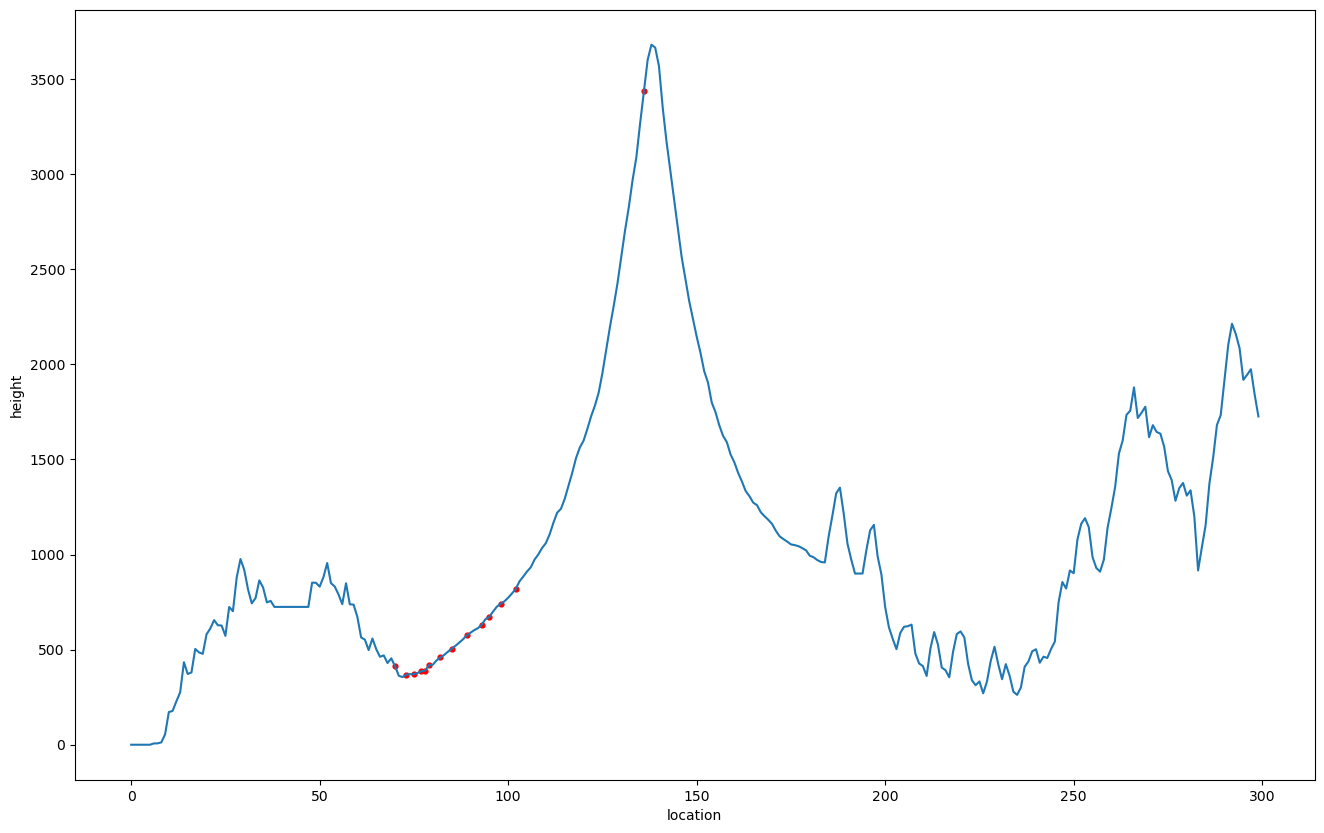

In [14]:
# 更新地点を赤点でマークする
ps = descent()
hs = ys[ps]

fig, ax = plt.subplots(figsize=(16,10))
ax.set_xlabel("location")
ax.set_ylabel("height")
ax.plot(xs, ys)
ax.scatter(ps, hs, color="red", s=12)
plt.show()

## 【問題6】初期値の変更

In [15]:
def descent(start=136, alpha=0.2):
    positions = [start]
    while True:
        current = positions[-1]
        p = move(current, alpha=alpha)
        if p in positions:
            return positions
        positions.append(p)

## 【問題7】初期値ごとの下山過程の可視化

In [16]:
def descent_plot(start=136, alpha=0.2):
    ps = descent(start, alpha=alpha)
    hs = ys[ps]
    fig, ax = plt.subplots(figsize=(16,10))
    ax.set_xlabel("location")
    ax.set_ylabel("height")
    ax.plot(xs, ys)
    ax.scatter(ps, hs, color="red", s=12)
    plt.show()

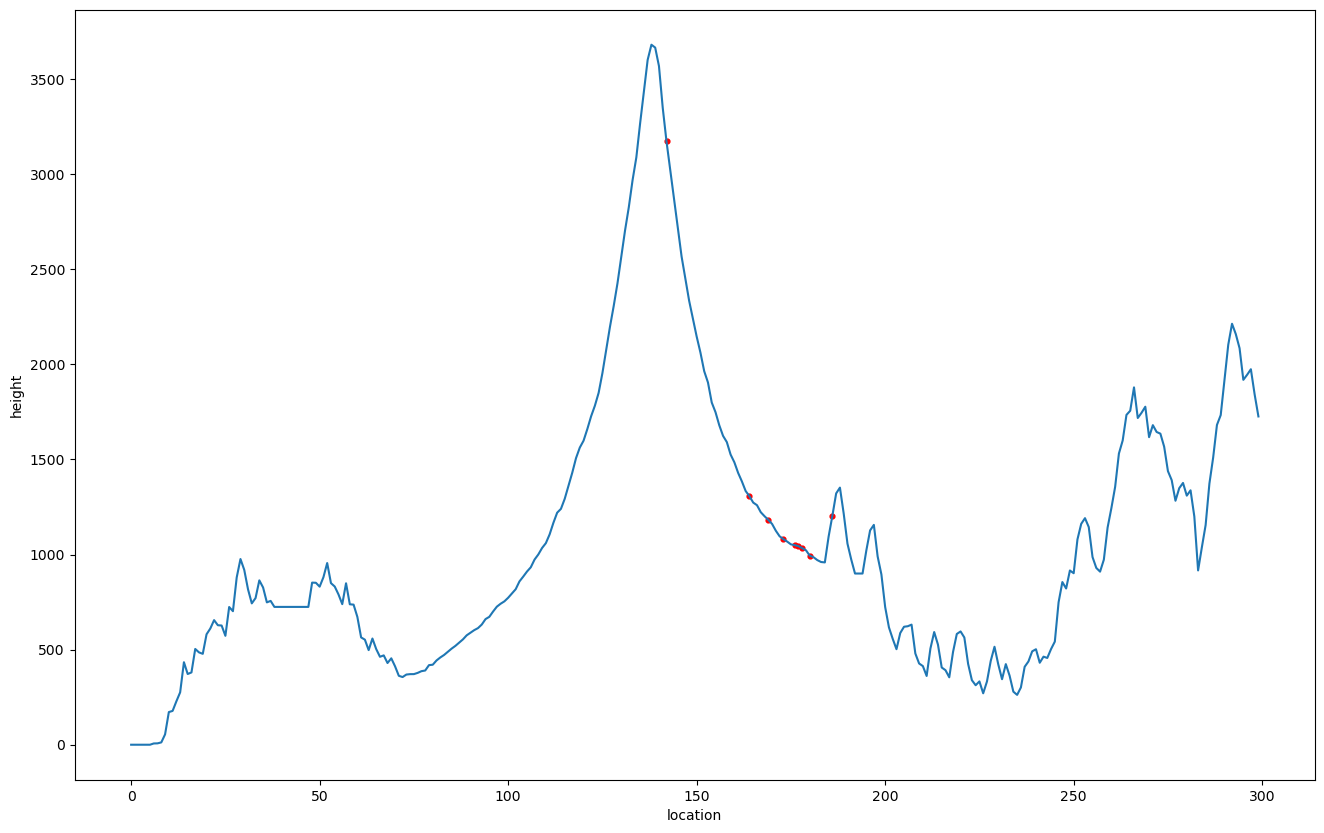

In [17]:
descent_plot(142)

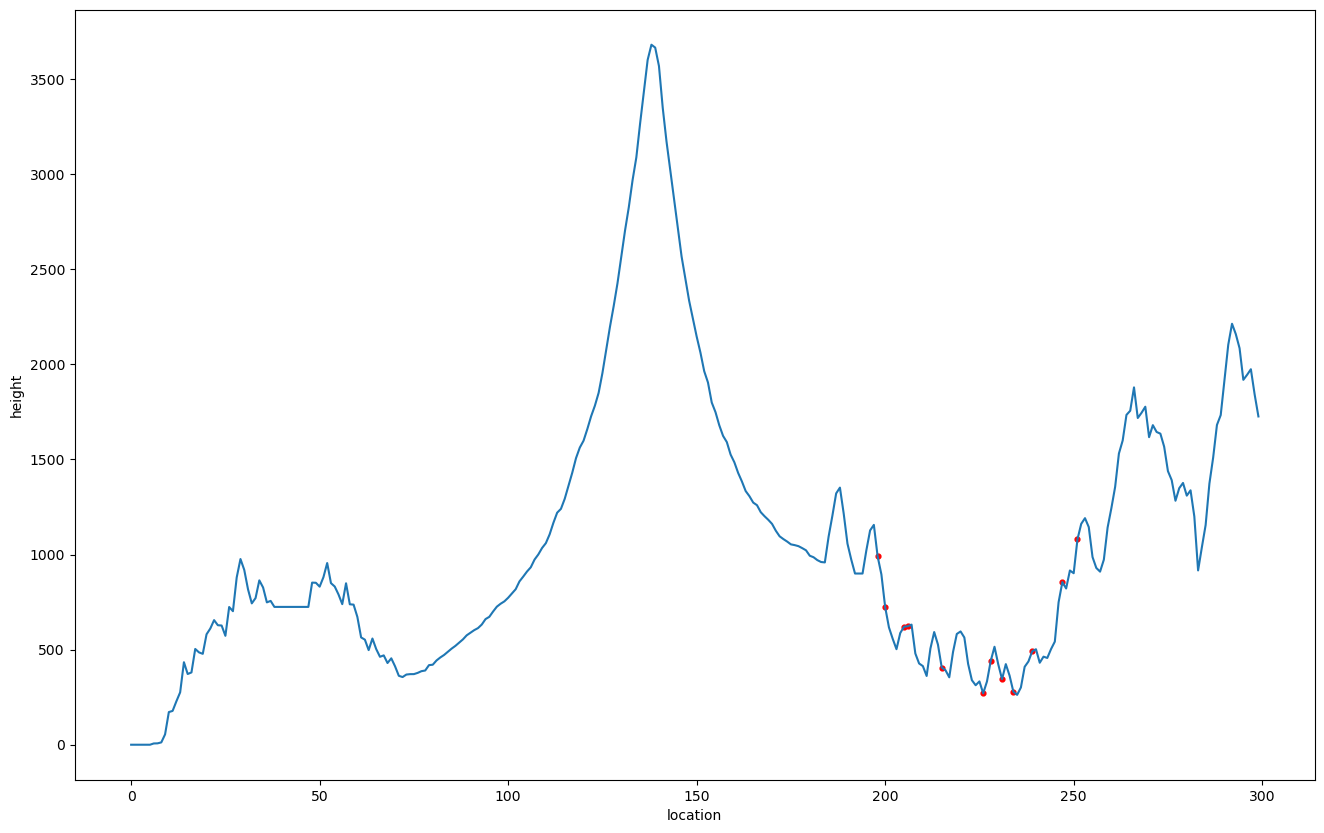

In [18]:
descent_plot(200)

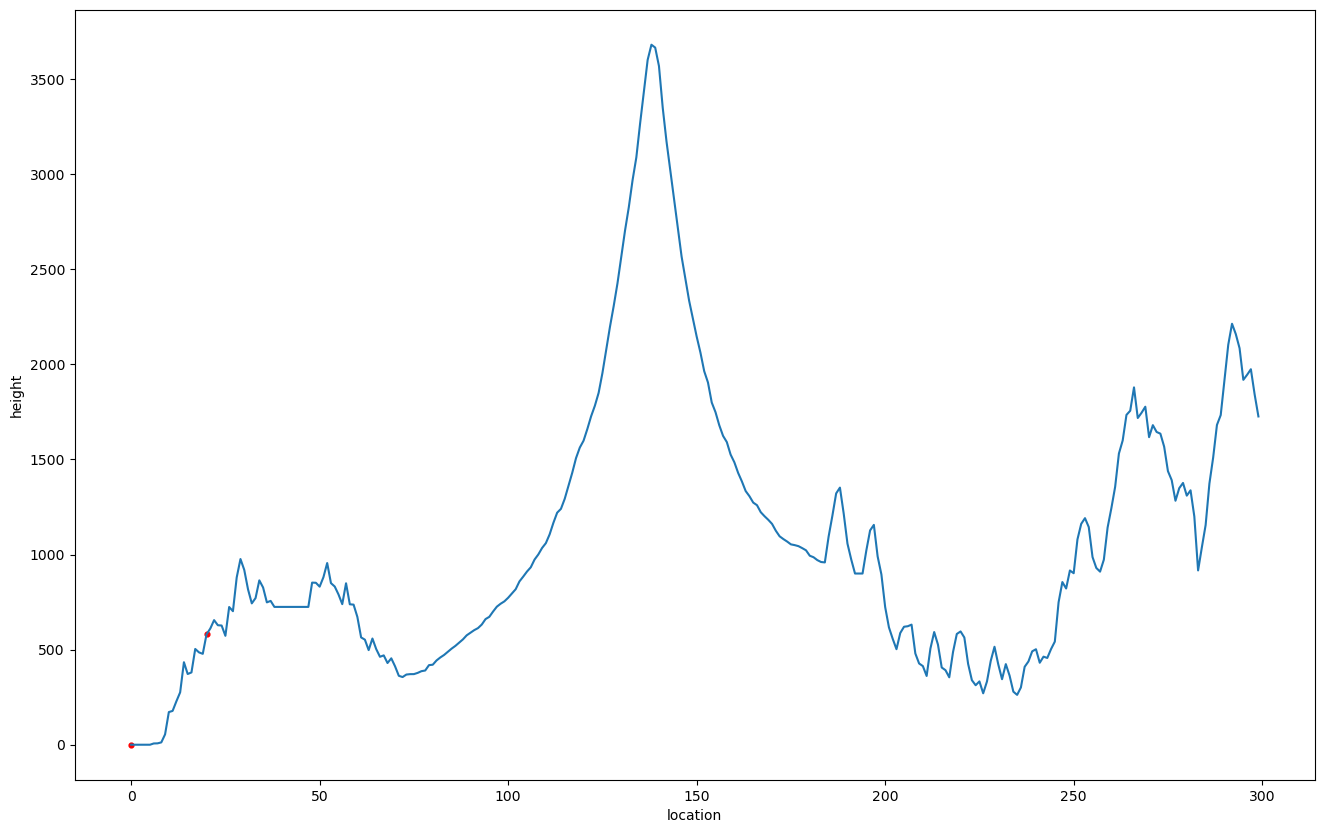

In [19]:
descent_plot(20)

## 【問題8】（アドバンス問題）ハイパーパラメータの変更

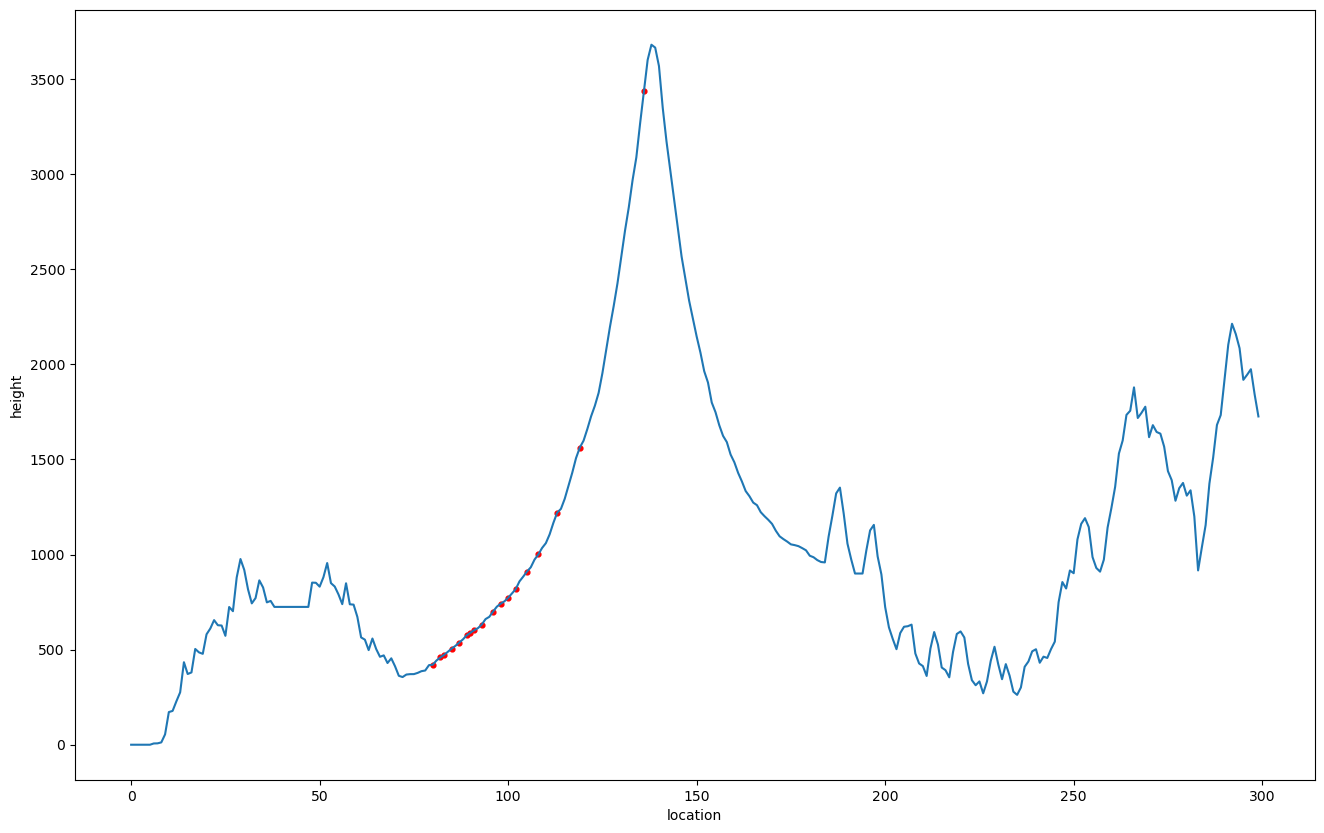

In [20]:
descent_plot(136, 0.1)

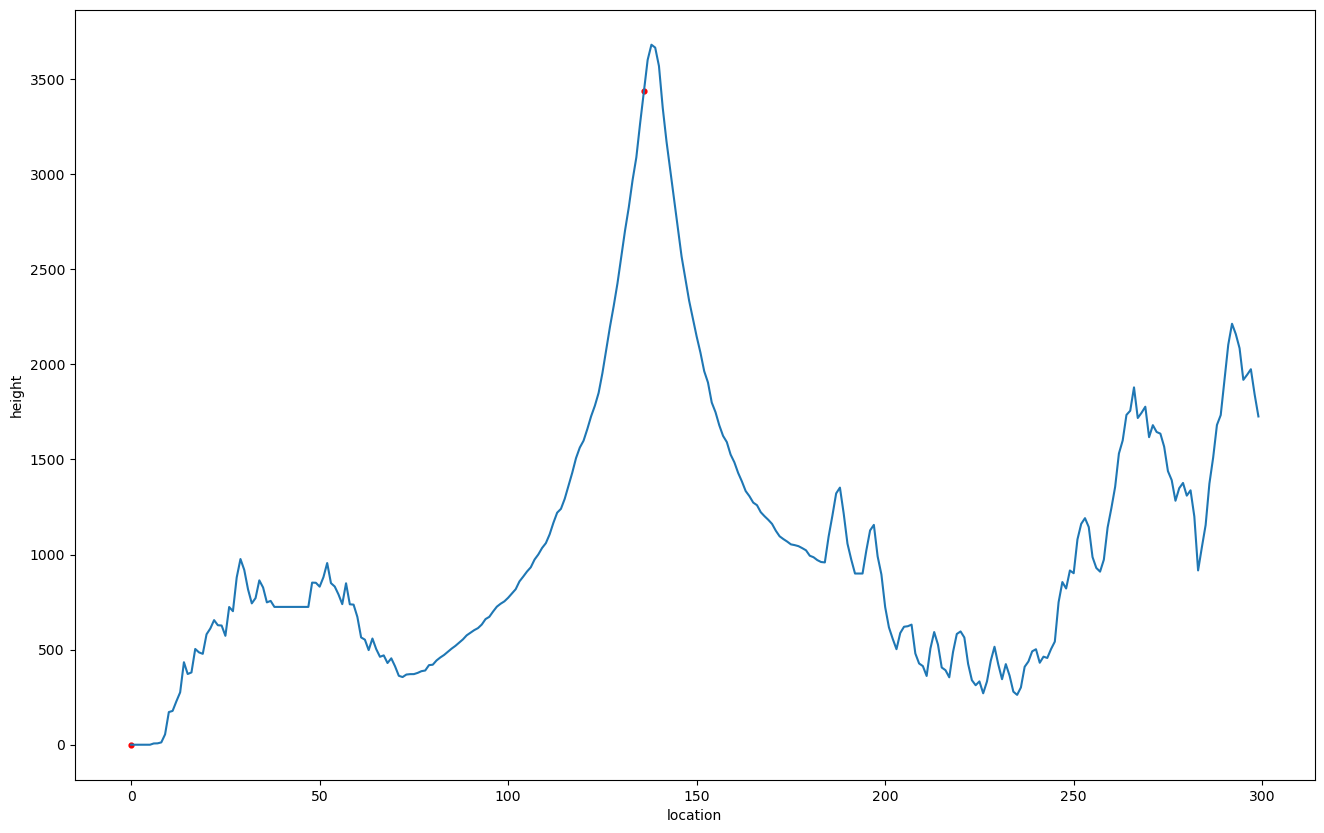

In [21]:
descent_plot(136, 1)

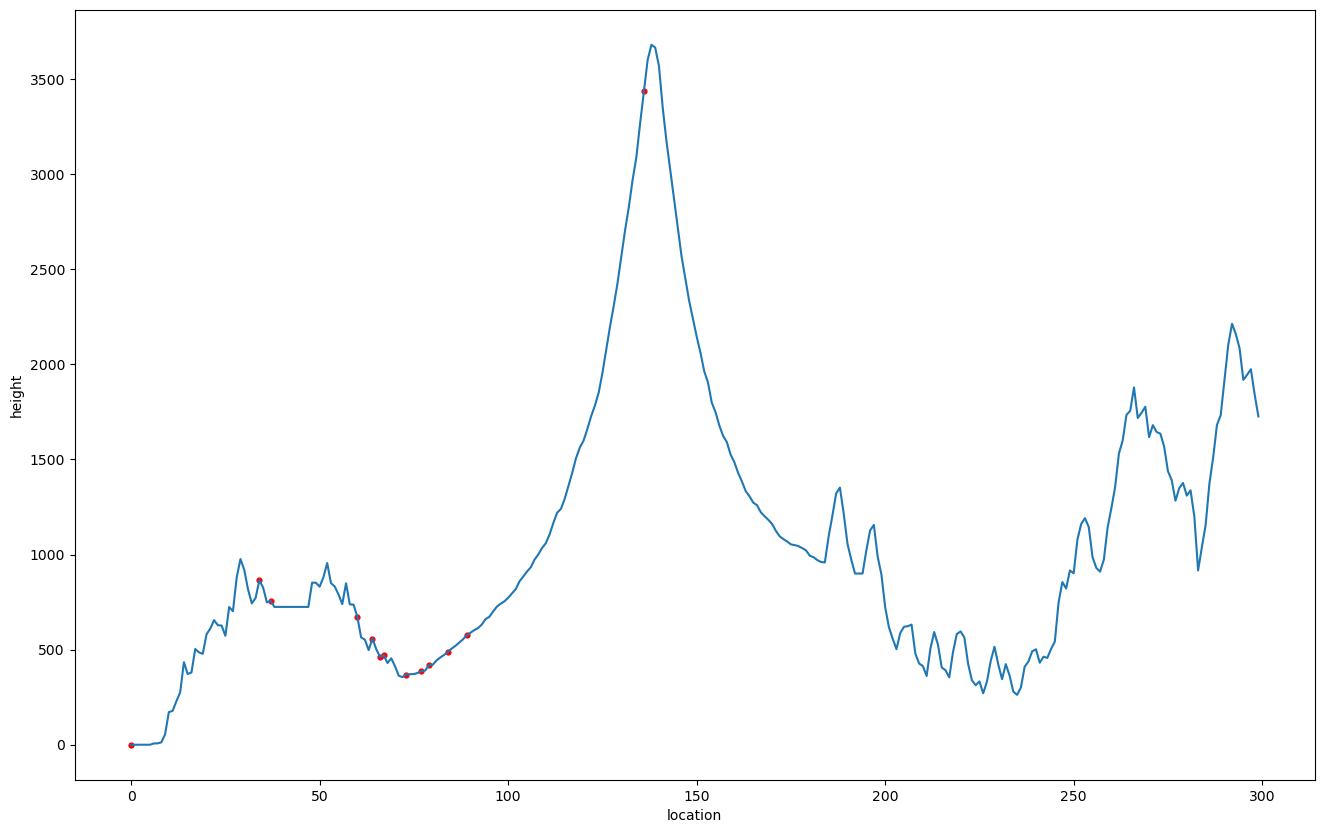

In [22]:
descent_plot(136, 0.45)